## Problem Statement.
* Diabetes Mellitus is one of the deadliest diseases all over the world.
* It is rapidly affecting youth especially women. People are unaware of this danger.
* Some patients are already affected but do not realise due to ignorance of symptoms.
* Our attempt is to analyse the data and solve the above issues.
* To predict diabetes via three different supervised machinelearning methods.
* The main objective of this work is to establish an information systemthat provides higher accuracy for
    predicting diabetes.

# Importing necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB,MultinomialNB
from sklearn import svm

## Loading dataset

In [2]:
data = pd.read_csv('austin-public-health-diabetes-self-management-education-participant-demographics-2015-2017-1.csv')
data.head()

,Class,Class Language,Age,Year,Gender,Insurance Category,Medical Home Category,Race/Ethnicity,Education Level,Diabetes Status (Yes/No),...,Fruits & Vegetable Consumption,Sugar-Sweetened Beverage Consumption,Food Measurement,Carbohydrate Counting,Exercise,Problem Area in Diabetes (PAID) Scale Score,ZIP code (address),ZIP code (city),ZIP code (state),ZIP code (zip)
0,APH,English,47.0,2016,F,Private insurance,Doctor's Office,American Indian,College,Yes,...,3-4,0,0 days,0 days,1 day,13.75,NaN,NaN,NaN,78741.0
1,PCHW,Spanish,35.0,2015,F,Other,NaN,Hispanic/Latino,NaN,No,...,1-2,2,I don't know how,I don't know how,1 day,NaN,NaN,NaN,NaN,78758.0
2,ARCF,English,58.0,2015,F,MediCARE,NaN,Black/African American,1-8,NaN,...,1-2,NaN,NaN,NaN,0 days,NaN,NaN,NaN,NaN,78753.0
3,PCHW,Spanish,41.0,2015,F,None,No regular place of care,Hispanic/Latino,NaN,No,...,1-2,2,I don't know how,I don't know how,4 days,NaN,NaN,NaN,NaN,78617.0
4,ARCF,English,56.0,2015,M,None,Emergency Room,NaN,College,No,...,1-2,1,0 days,0 days,0 days,NaN,NaN,NaN,NaN,78720.0


In [3]:
data.shape

(1688, 25)

In [4]:
data.describe()

,Age,Year,Problem Area in Diabetes (PAID) Scale Score,ZIP code (address),ZIP code (city),ZIP code (state),ZIP code (zip)
count,1656.000000,1688.000000,632.000000,0.0,0.0,0.0,1513.000000
mean,49.282609,2016.039692,44.242484,NaN,NaN,NaN,78709.126900
std,15.194484,0.774650,27.343186,NaN,NaN,NaN,141.785258
min,16.000000,2015.000000,0.000000,NaN,NaN,NaN,76537.000000
25%,37.000000,2015.000000,21.250000,NaN,NaN,NaN,78704.000000
50%,49.000000,2016.000000,41.250000,NaN,NaN,NaN,78737.000000
75%,60.000000,2017.000000,67.500000,NaN,NaN,NaN,78747.000000
max,93.000000,2017.000000,100.000000,NaN,NaN,NaN,78783.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 25 columns):
Class                                          1688 non-null object
Class Language                                 1688 non-null object
Age                                            1656 non-null float64
Year                                           1688 non-null int64
Gender                                         1651 non-null object
Insurance Category                             1575 non-null object
Medical Home Category                          1597 non-null object
Race/Ethnicity                                 1651 non-null object
Education Level                                1399 non-null object
Diabetes Status (Yes/No)                       1658 non-null object
Heart Disease (Yes/No)                         1588 non-null object
High Blood Pressure (Yes/No)                   1595 non-null object
Tobacco Use (Yes/No)                           1564 non-null object
Previous 

## Droping unnecessary columns.

In [6]:
data.drop(['ZIP code (address)','ZIP code (city)','ZIP code (state)'],axis=1,inplace=True)

In [7]:
data.shape

(1688, 22)

### relpacing column names

In [8]:
data.columns = data.columns.str.replace('(Yes/No)','')
data.columns = data.columns.str.replace('[\(\)]','')
data.columns = data.columns.str.replace(' ','_')
data.columns

Index(['Class', 'Class_Language', 'Age', 'Year', 'Gender',
       'Insurance_Category', 'Medical_Home_Category', 'Race/Ethnicity',
       'Education_Level', 'Diabetes_Status_', 'Heart_Disease_',
       'High_Blood_Pressure_', 'Tobacco_Use_', 'Previous_Diabetes_Education_',
       'Diabetes_Knowledge', 'Fruits_&_Vegetable_Consumption',
       'Sugar-Sweetened_Beverage_Consumption', 'Food_Measurement',
       'Carbohydrate_Counting', 'Exercise',
       'Problem_Area_in_Diabetes_PAID_Scale_Score', 'ZIP_code_zip'],
      dtype='object')

### Renaming columns

In [9]:
data.rename(columns = {'Diabetes_Status_':'Diabetes_Status', 'Heart_Disease_':'Heart_Disease','High_Blood_Pressure_':'High_BP','Tobacco_Use_':'Tobacco_Use','Previous_Diabetes_Education_':'Previous_Diabetes_Education','Problem_Area_in_Diabetes_PAID_Scale_Score':'PAID','ZIP_code_zip':'Zip_code','Carbohydrate_Counting':'Carbs_counting','Fruits_&_Vegetable_Consumption':'Fruits_and_Veges_Consumption','Sugar-Sweetened_Beverage_Consumption':'Sugar_Beverage_Consumption','Race/Ethnicity':'Race'},inplace=True)

In [10]:
data.dtypes

Class                            object
Class_Language                   object
Age                             float64
Year                              int64
Gender                           object
Insurance_Category               object
Medical_Home_Category            object
Race                             object
Education_Level                  object
Diabetes_Status                  object
Heart_Disease                    object
High_BP                          object
Tobacco_Use                      object
Previous_Diabetes_Education      object
Diabetes_Knowledge               object
Fruits_and_Veges_Consumption     object
Sugar_Beverage_Consumption       object
Food_Measurement                 object
Carbs_counting                   object
Exercise                         object
PAID                            float64
Zip_code                        float64
dtype: object

### Checking null values

In [11]:
data.isnull().sum()

Class                              0
Class_Language                     0
Age                               32
Year                               0
Gender                            37
Insurance_Category               113
Medical_Home_Category             91
Race                              37
Education_Level                  289
Diabetes_Status                   30
Heart_Disease                    100
High_BP                           93
Tobacco_Use                      124
Previous_Diabetes_Education      125
Diabetes_Knowledge               154
Fruits_and_Veges_Consumption      52
Sugar_Beverage_Consumption        53
Food_Measurement                  63
Carbs_counting                    66
Exercise                          78
PAID                            1056
Zip_code                         175
dtype: int64

In [12]:
# taking value counts of each observation in gender column.
data['Gender'].value_counts()

F    1335
M     315
f       1
Name: Gender, dtype: int64

In [13]:
# replacing the observation.
data.Gender=data.Gender.str.replace('f','F')

In [14]:
data.Gender.value_counts()

F    1336
M     315
Name: Gender, dtype: int64

In [15]:
# Taking the unique values of the column
data.Insurance_Category.unique()

array(['Private insurance', 'Other', 'MediCARE', 'None', nan, 'Medicaid',
       'MAP'], dtype=object)

In [16]:
data.Insurance_Category.value_counts()

None                 458
Other                282
Private insurance    269
MediCARE             195
MAP                  194
Medicaid             177
Name: Insurance_Category, dtype: int64

In [17]:
# creating a variable cols containing two columns.
cols = ['Age','PAID']

In [18]:
# filling the null values of these columns with the mean of the variable.
data[cols]=data[cols].fillna(data.mean().iloc[0])

In [19]:
# creating a variable col containing these columns.
col = ['Gender','Insurance_Category', 'Medical_Home_Category', 'Race','Education_Level', 'Diabetes_Status', 'Heart_Disease', 'High_BP',
       'Tobacco_Use', 'Previous_Diabetes_Education',
       'Fruits_and_Veges_Consumption', 'Sugar_Beverage_Consumption',
       'Food_Measurement', 'Carbs_counting', 'Exercise']

In [20]:
# filling the null values by using forward filling 
data[col]=data[col].fillna(method='ffill')

In [21]:
# filling the null values by using median
data['Zip_code']=data.Zip_code.fillna(data['Zip_code'].median())

In [22]:
# filling the null values by using backward filling
data['Diabetes_Knowledge']=data.Diabetes_Knowledge.fillna(method='bfill')

In [23]:
# again checking the null values
data.isna().sum()

Class                           0
Class_Language                  0
Age                             0
Year                            0
Gender                          0
Insurance_Category              0
Medical_Home_Category           0
Race                            0
Education_Level                 0
Diabetes_Status                 0
Heart_Disease                   0
High_BP                         0
Tobacco_Use                     0
Previous_Diabetes_Education     0
Diabetes_Knowledge              0
Fruits_and_Veges_Consumption    0
Sugar_Beverage_Consumption      0
Food_Measurement                0
Carbs_counting                  0
Exercise                        0
PAID                            0
Zip_code                        0
dtype: int64

# Repeating the process of checking unique values and replacing them.

In [24]:
data.Race.unique()

array(['American Indian', 'Hispanic/Latino', 'Black/African American',
       'Asian', 'White', 'Other', 'Unknown'], dtype=object)

In [25]:
data.Race = data.Race.str.replace('/Latino','')
data.Race = data.Race.str.replace('Black/','')

In [26]:
data.Race.unique()

array(['American Indian', 'Hispanic', 'African American', 'Asian',
       'White', 'Other', 'Unknown'], dtype=object)

In [27]:
data['Education_Level'].unique()


array(['College', '1-8', 'Some College', 'High School GED', '9-11', 'y',
       'n', 'none'], dtype=object)

In [28]:
data.Education_Level = data.Education_Level.str.replace('1-8','Primary')
data.Education_Level = data.Education_Level.str.replace('9-11','Higher Secondary')

In [29]:
data['Education_Level'].value_counts()

Primary             405
High School GED     353
College             341
Higher Secondary    315
Some College        267
y                     3
n                     3
none                  1
Name: Education_Level, dtype: int64

### changing the datatype of these columns

In [30]:
data['Age'] = data.Age.astype(int)
data['Zip_code'] = data.Zip_code.astype(int)


In [31]:
data.Diabetes_Status.unique()

array(['Yes', 'No', 'Unknown'], dtype=object)

In [32]:
data.Diabetes_Status.value_counts()

No         954
Yes        720
Unknown     14
Name: Diabetes_Status, dtype: int64

In [33]:
data.Heart_Disease.value_counts()

No     1565
Yes     123
Name: Heart_Disease, dtype: int64

In [34]:
data.head()

,Class,Class_Language,Age,Year,Gender,Insurance_Category,Medical_Home_Category,Race,Education_Level,Diabetes_Status,...,Tobacco_Use,Previous_Diabetes_Education,Diabetes_Knowledge,Fruits_and_Veges_Consumption,Sugar_Beverage_Consumption,Food_Measurement,Carbs_counting,Exercise,PAID,Zip_code
0,APH,English,47,2016,F,Private insurance,Doctor's Office,American Indian,College,Yes,...,No,Yes,Fair,3-4,0,0 days,0 days,1 day,13.750000,78741
1,PCHW,Spanish,35,2015,F,Other,Doctor's Office,Hispanic,College,No,...,No,No,Fair,1-2,2,I don't know how,I don't know how,1 day,49.282609,78758
2,ARCF,English,58,2015,F,MediCARE,Doctor's Office,African American,Primary,No,...,No,No,Fair,1-2,2,I don't know how,I don't know how,0 days,49.282609,78753
3,PCHW,Spanish,41,2015,F,None,No regular place of care,Hispanic,Primary,No,...,No,No,Good,1-2,2,I don't know how,I don't know how,4 days,49.282609,78617
4,ARCF,English,56,2015,M,None,Emergency Room,Hispanic,College,No,...,No,No,Good,1-2,1,0 days,0 days,0 days,49.282609,78720


## Selecting the Unknown values of the Diabetes_Status column.

In [35]:
data1=data[data.Diabetes_Status.str.contains('Unknown')]
print(data1.shape)
data1

(14, 22)


,Class,Class_Language,Age,Year,Gender,Insurance_Category,Medical_Home_Category,Race,Education_Level,Diabetes_Status,...,Tobacco_Use,Previous_Diabetes_Education,Diabetes_Knowledge,Fruits_and_Veges_Consumption,Sugar_Beverage_Consumption,Food_Measurement,Carbs_counting,Exercise,PAID,Zip_code
12,PCHW,Spanish,34,2015,F,None,Doctor's Office,Hispanic,High School GED,Unknown,...,No,No,Poor,1-2,1,0 days,0 days,0 days,49.282609,78737
70,APH,Spanish,46,2017,M,None,No regular place of care,Hispanic,Higher Secondary,Unknown,...,No,No,Poor,1-2,Not Sure,0,I don't know how,1 day,49.282609,78753
131,PCHW,Spanish,41,2015,F,None,No regular place of care,Hispanic,College,Unknown,...,No,Yes,Fair,1-2,0,0 days,0 days,2 days,49.282609,78737
286,APH,Chinese/English,49,2017,F,Other,CommUnityCare,Asian,Primary,Unknown,...,No,No,Poor,1-2,2,0 days,0 days,1 day,49.282609,78737
480,APH,Spanish,34,2017,F,Other,CommUnityCare,Hispanic,Higher Secondary,Unknown,...,No,No,Good,3-4,2,1-3,1-3,2 days,49.282609,78745
577,APH,Chinese/English,49,2017,F,Private insurance,Seton Clinics,Asian,Some College,Unknown,...,No,Yes,Good,1-2,0,1-3,4 or more,2 days,49.282609,78737
585,APH,Spanish,52,2017,F,None,No regular place of care,Hispanic,Primary,Unknown,...,No,No,Poor,1-2,2,0 days,0 days,0 days,49.282609,78602
592,APH,Spanish,32,2017,F,None,CommUnityCare,Hispanic,Primary,Unknown,...,No,No,Poor,3-4,1,0,1-3,3 days,49.282609,78745
798,APH,Spanish,54,2016,F,MAP,CommUnityCare,Hispanic,Higher Secondary,Unknown,...,No,Yes,Good,5 or more,1,1-3,1-3,4 days,49.282609,78745
955,APH,Chinese/English,49,2017,F,Other,Lone Star Circle of Care,Asian,Higher Secondary,Unknown,...,No,No,Good,1-2,3 or more,1-3,4 or more,2 days,49.282609,78737


## Dropping all the unnecessary values.

In [36]:
data.drop([12,70,131,286,480,577,585,592,798,955,1148,1441,1487,1671],axis=0,inplace=True)

In [37]:
# taking the value count of this column
data.Diabetes_Status.value_counts()

No     954
Yes    720
Name: Diabetes_Status, dtype: int64

In [38]:
# Mapping the yes and no with 1 & 0
data['Diabetes_Status'] = data.Diabetes_Status.map({'Yes':1,'No':0})

In [39]:
data.Diabetes_Status.value_counts()

0    954
1    720
Name: Diabetes_Status, dtype: int64

In [40]:
# Divinding the dataset into independent & dependent variable X & y
X = data.drop('Diabetes_Status', axis='columns')
X.shape

(1674, 21)

In [41]:
y = data.Diabetes_Status
y.shape

(1674,)

In [42]:
# Creating dummy variables of all the categorical values.
X = pd.get_dummies(X, columns=['Class', 'Class_Language', 'Gender',
       'Insurance_Category', 'Medical_Home_Category', 'Race',
       'Education_Level', 'Heart_Disease', 'High_BP', 'Tobacco_Use',
       'Previous_Diabetes_Education', 'Diabetes_Knowledge',
       'Fruits_and_Veges_Consumption', 'Sugar_Beverage_Consumption',
       'Food_Measurement', 'Carbs_counting', 'Exercise'],drop_first=True)

In [43]:
X.head()

,Age,Year,PAID,Zip_code,Class_ARCF,Class_EB,Class_PCHW,Class_Language_English,Class_Language_Spanish,Gender_M,...,Carbs_counting_1-3,Carbs_counting_4 or more,Carbs_counting_I don't know how,Carbs_counting_Not Sure,Exercise_1 day,Exercise_2 days,Exercise_3 days,Exercise_4 days,Exercise_5 or more days,Exercise_Not Sure
0,47,2016,13.750000,78741,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,35,2015,49.282609,78758,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2,58,2015,49.282609,78753,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,41,2015,49.282609,78617,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,56,2015,49.282609,78720,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
X.shape

(1674, 65)

In [47]:
y.shape

(1674,)

In [48]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Diabetes_Status, dtype: int64

# visualizing some necessary plots.

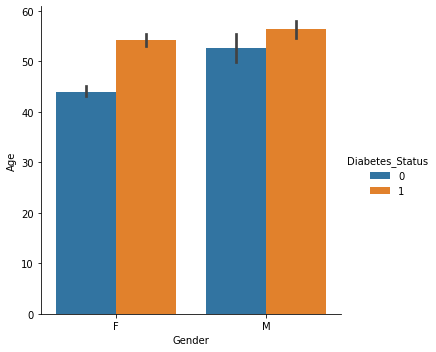

In [49]:
sns.catplot('Gender', 'Age', hue = 'Diabetes_Status', data = data, kind='bar')

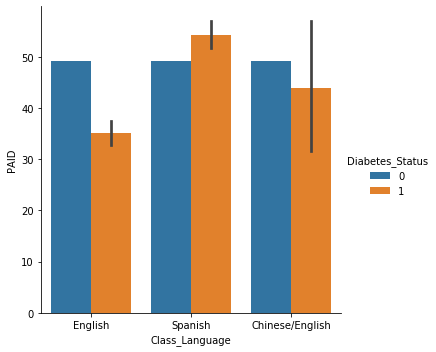

In [50]:
sns.catplot('Class_Language', 'PAID',hue='Diabetes_Status',data=data,kind='bar')

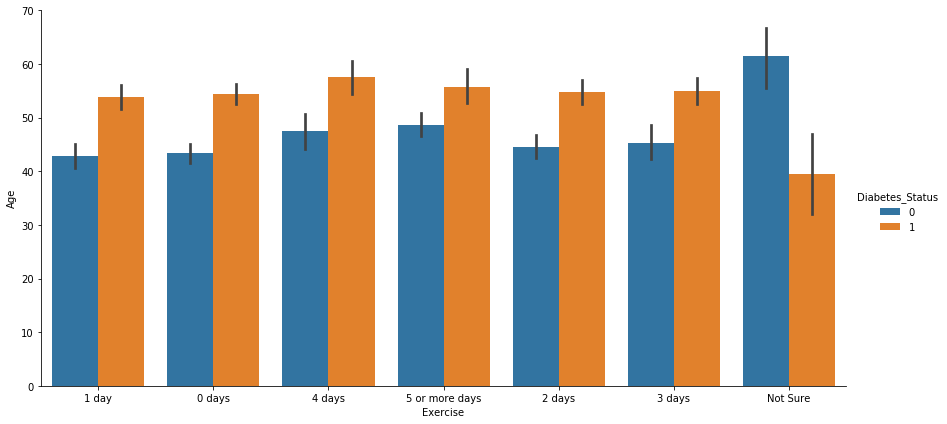

In [51]:
sns.catplot('Exercise', 'Age', hue = 'Diabetes_Status', data = data, kind='bar', height=6, aspect=2)

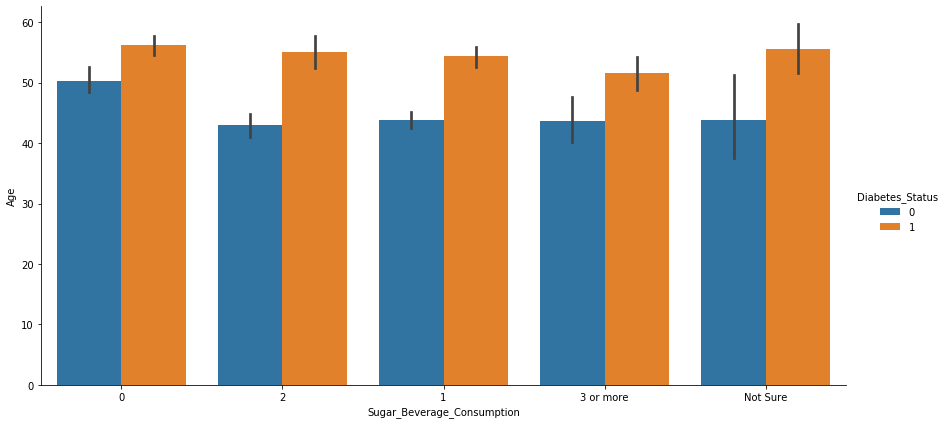

In [52]:
sns.catplot('Sugar_Beverage_Consumption', 'Age', hue = 'Diabetes_Status', data = data, kind='bar', height=6, aspect=2)

# checking the correlation.

In [53]:
data.corr()

,Age,Year,Diabetes_Status,PAID,Zip_code
Age,1.000000,0.044729,0.319220,-0.165225,-0.015934
Year,0.044729,1.000000,0.010554,-0.002294,-0.027890
Diabetes_Status,0.319220,0.010554,1.000000,-0.129114,-0.029640
PAID,-0.165225,-0.002294,-0.129114,1.000000,0.026667
Zip_code,-0.015934,-0.027890,-0.029640,0.026667,1.000000


# Without feature selection we using DT to check the accuracy.

In [54]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X, y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [55]:
# using cross validation to overcome the overfitting problem.
cross_val_score(classifier, X, y, cv=5, scoring='accuracy').mean()

0.9115899544195191

# Feature Selection Techniques.

## Univariate Selection

In [56]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [57]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)

In [58]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [59]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [60]:
featureScores

,Specs,Score
0,Age,786.464716
1,Year,0.000055
2,PAID,169.505659
3,Zip_code,0.340352
4,Class_ARCF,14.047497
...,...,...
60,Exercise_2 days,1.980314
61,Exercise_3 days,1.903933
62,Exercise_4 days,0.303383
63,Exercise_5 or more days,10.925534


In [61]:
print(featureScores.nlargest(6,'Score'))

                              Specs       Score
0                               Age  786.464716
2                              PAID  169.505659
37                      High_BP_Yes   92.632300
9                          Gender_M   47.191690
39  Previous_Diabetes_Education_Yes   43.577150
7            Class_Language_English   36.088960


## Feature Importance.

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)


/home/ritu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [63]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


[0.07721683 0.0212906  0.21410062 0.03215447 0.00953668 0.01417636
 0.00683893 0.01245338 0.01374127 0.02595875 0.01029654 0.01048974
 0.01242908 0.01173051 0.01092761 0.01147438 0.00767792 0.00375045
 0.00502569 0.00941808 0.0116283  0.01198959 0.00592624 0.00054423
 0.00321957 0.01121556 0.00098687 0.00040565 0.00819336 0.01320531
 0.00987273 0.01265974 0.01130603 0.00180286 0.00030577 0.00069299
 0.01014909 0.0488575  0.00782468 0.03253554 0.01932323 0.01562648
 0.01610254 0.0146849  0.00868737 0.00338066 0.0186129  0.01232479
 0.01221142 0.00219161 0.01556374 0.01625361 0.00928618 0.01224099
 0.         0.01300379 0.0073434  0.00892988 0.         0.01369916
 0.0150658  0.01485935 0.00888586 0.01671494 0.00099788]


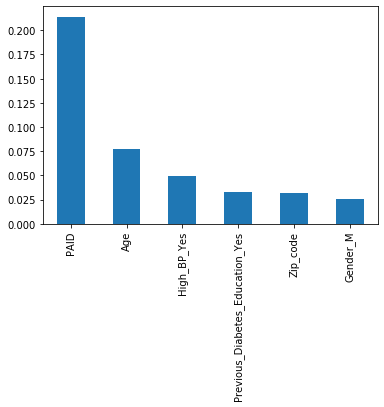

In [64]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='bar')
plt.show()


In [65]:
# Creating new Independent variable X with the features.
X = X.loc[:,['PAID','Age','Previous_Diabetes_Education_Yes','Gender_M','Class_Language_English','High_BP_Yes','Class_Language_Spanish']]

In [66]:
X.shape

(1674, 7)

In [67]:
X.isnull().sum()

PAID                               0
Age                                0
Previous_Diabetes_Education_Yes    0
Gender_M                           0
Class_Language_English             0
High_BP_Yes                        0
Class_Language_Spanish             0
dtype: int64

## Applying feature scaling technique

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)
X

array([[-1.98237597, -0.15429054,  1.28730061, ...,  1.26946621,
        -0.75521949, -1.21957779],
       [ 0.11216699, -0.95002566, -0.77681933, ..., -0.78773266,
        -0.75521949,  0.8199559 ],
       [ 0.11216699,  0.57513332, -0.77681933, ...,  1.26946621,
         1.32411838, -1.21957779],
       ...,
       [ 0.11216699, -0.02166802, -0.77681933, ...,  1.26946621,
         1.32411838, -1.21957779],
       [-0.95080235, -1.48051574, -0.77681933, ..., -0.78773266,
        -0.75521949,  0.8199559 ],
       [ 0.11216699,  0.57513332, -0.77681933, ..., -0.78773266,
        -0.75521949,  0.8199559 ]])

In [69]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X, y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [70]:
cross_val_score(classifier, X, y, cv=5, scoring='accuracy').mean()

0.9247350075967468

In [71]:
# for tuning the hyperparametes we are using Grid search here.
from sklearn.model_selection import GridSearchCV

In [72]:
# define the parameter values that should be searched
max_depth_range = list(range(1, 10))
max_leaf_nodes_range = list(range(2, 10))

In [73]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=max_depth_range, max_leaf_nodes=max_leaf_nodes_range)
print(param_grid)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9]}


In [74]:
# instantiate and fit the grid
grid = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9]}

In [75]:
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.790920,0.016324,"{'max_depth': 1, 'max_leaf_nodes': 2}"
1,0.790920,0.016324,"{'max_depth': 1, 'max_leaf_nodes': 3}"
2,0.790920,0.016324,"{'max_depth': 1, 'max_leaf_nodes': 4}"
3,0.790920,0.016324,"{'max_depth': 1, 'max_leaf_nodes': 5}"
4,0.790920,0.016324,"{'max_depth': 1, 'max_leaf_nodes': 6}"
...,...,...,...
67,0.947431,0.011219,"{'max_depth': 9, 'max_leaf_nodes': 5}"
68,0.946834,0.011431,"{'max_depth': 9, 'max_leaf_nodes': 6}"
69,0.946834,0.011431,"{'max_depth': 9, 'max_leaf_nodes': 7}"
70,0.946834,0.011431,"{'max_depth': 9, 'max_leaf_nodes': 8}"


In [76]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.9474313022700119
{'max_depth': 2, 'max_leaf_nodes': 3}


## Spliting the dataset into 80% of training set & 20% of testing set.

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=100)

In [84]:
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0,max_depth=2,max_leaf_nodes=3)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

## predicting the test results

In [85]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

## creating confusion matrix

In [81]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[181,   0],
       [ 18, 136]])

## creating Classification report.

In [82]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      1.00      0.95       181\n           1       1.00      0.88      0.94       154\n\n    accuracy                           0.95       335\n   macro avg       0.95      0.94      0.95       335\nweighted avg       0.95      0.95      0.95       335\n'

In [83]:
cross_val_score(classifier, X, y, cv=5, scoring='accuracy').mean()

0.9474322995799446

## Applying Naive bayes

In [86]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB,MultinomialNB

In [87]:
ber = BernoulliNB()
ber.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [88]:
cross_val_score(ber, X, y, cv=5, scoring='accuracy').mean()

0.7461274465993386

In [89]:
y_pred = ber.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

## creating confusion matrix

In [90]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[152,  29],
       [ 54, 100]])

## creating classification report

In [91]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.74      0.84      0.79       181\n           1       0.78      0.65      0.71       154\n\n    accuracy                           0.75       335\n   macro avg       0.76      0.74      0.75       335\nweighted avg       0.76      0.75      0.75       335\n'

## Applying SVM

In [92]:
from sklearn import svm

In [93]:
rb = svm.SVC(kernel='rbf')
rb.fit(X_train,y_train)

/home/ritu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [94]:
y_pred = rb.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,

## creating confusion matrix

In [95]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[171,  10],
       [ 36, 118]])

## creating classification report

In [96]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.94      0.88       181\n           1       0.92      0.77      0.84       154\n\n    accuracy                           0.86       335\n   macro avg       0.87      0.86      0.86       335\nweighted avg       0.87      0.86      0.86       335\n'

In [97]:
accuracy_score(y_test,y_pred)

0.8626865671641791

## Grid Search Analysis for SVM.

In [98]:
c= list(range(1,10))
Gamma=[3,2,1,0.1]

In [99]:
## create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=c, gamma=Gamma)
print(param_grid)

{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'gamma': [3, 2, 1, 0.1]}


In [100]:
# instantiate and fit the grid
grid = GridSearchCV(rb, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'gamma': [3, 2, 1, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [101]:
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.866786,0.024649,"{'C': 1, 'gamma': 3}"
1,0.865591,0.024123,"{'C': 1, 'gamma': 2}"
2,0.851852,0.022502,"{'C': 1, 'gamma': 1}"
3,0.836320,0.025486,"{'C': 1, 'gamma': 0.1}"
4,0.875747,0.021331,"{'C': 2, 'gamma': 3}"
5,0.867384,0.022281,"{'C': 2, 'gamma': 2}"
6,0.854241,0.021772,"{'C': 2, 'gamma': 1}"
7,0.840502,0.023526,"{'C': 2, 'gamma': 0.1}"
8,0.875149,0.018794,"{'C': 3, 'gamma': 3}"
9,0.868578,0.020631,"{'C': 3, 'gamma': 2}"


In [102]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8829151732377539
{'C': 9, 'gamma': 3}


## Again applying the SVM with tuned Hyperparameter.

In [103]:
rb = svm.SVC(kernel='rbf', C=9, gamma = 3)
rb.fit(X_train,y_train)

SVC(C=9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [104]:
y_pred = rb.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

## creating confusion matrix

In [105]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[176,   5],
       [ 32, 122]])

## creating classfication report

In [106]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.97      0.90       181\n           1       0.96      0.79      0.87       154\n\n    accuracy                           0.89       335\n   macro avg       0.90      0.88      0.89       335\nweighted avg       0.90      0.89      0.89       335\n'

In [107]:
accuracy_score(y_test,y_pred)

0.8895522388059701

## Applying XGBoost

In [108]:
from xgboost import XGBClassifier

## Tuned XGBoost 

In [109]:
boost = XGBClassifier(gamma=0,max_depth=2,n_estimators=2,learning_rate=0.1)
boost.fit(X_train,y_train)
boost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
Gamma = [0]
estimators=list(range(2,10))
learn_rate=[0,0.1,0.01,0.0001,0.2,0.02,0.3,0.03]
max_dept=list(range(2,10))

In [111]:
param_grid=dict(gamma=Gamma,n_estimators=estimators,learning_rate=learn_rate,max_depth=max_dept)
param_grid

{'gamma': [0],
 'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9],
 'learning_rate': [0, 0.1, 0.01, 0.0001, 0.2, 0.02, 0.3, 0.03],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}

In [112]:
# instantiate and fit the grid
grid = GridSearchCV(boost, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),
             iid='warn', n_jobs=Non

In [113]:
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.569892,0.001258,"{'gamma': 0, 'learning_rate': 0, 'max_depth': ..."
1,0.569892,0.001258,"{'gamma': 0, 'learning_rate': 0, 'max_depth': ..."
2,0.569892,0.001258,"{'gamma': 0, 'learning_rate': 0, 'max_depth': ..."
3,0.569892,0.001258,"{'gamma': 0, 'learning_rate': 0, 'max_depth': ..."
4,0.569892,0.001258,"{'gamma': 0, 'learning_rate': 0, 'max_depth': ..."
...,...,...,...
507,0.945639,0.011427,"{'gamma': 0, 'learning_rate': 0.03, 'max_depth..."
508,0.945639,0.011427,"{'gamma': 0, 'learning_rate': 0.03, 'max_depth..."
509,0.945639,0.011427,"{'gamma': 0, 'learning_rate': 0.03, 'max_depth..."
510,0.945639,0.011427,"{'gamma': 0, 'learning_rate': 0.03, 'max_depth..."


In [114]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.9474313022700119
{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 2}


In [115]:
y_pred = boost.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,

In [116]:
cross_val_score(classifier, X, y, cv=5, scoring='accuracy').mean()

0.9474322995799446

## creating classification report

In [117]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      1.00      0.95       181\n           1       1.00      0.88      0.94       154\n\n    accuracy                           0.95       335\n   macro avg       0.95      0.94      0.95       335\nweighted avg       0.95      0.95      0.95       335\n'

## creating confusion matrix

In [108]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[181,   0],
       [ 18, 136]])